In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from paths import *


## Custom functions

In [2]:
def print_patient_count(df):
    total_patients = df["Unique Tube Label ID"].unique().shape[0]
    total_ms_patients = df[df["Group Name"]=="MS"]["Unique Tube Label ID"].unique().shape[0]
    total_ms_patients_treated = df[(df["Group Name"]=="MS") & (df["Treatment"]=="Treated")]["Unique Tube Label ID"].unique().shape[0]
    total_ms_patients_non_treated = df[(df["Group Name"]=="MS") & (df["Treatment"]=="Off")]["Unique Tube Label ID"].unique().shape[0]
    total_control_patients = df[df["Group Name"]=="Control"]["Unique Tube Label ID"].unique().shape[0]
    print("Total patients = ", total_patients)
    print("Total MS patients = ", total_ms_patients)
    print("Total MS patients - Treated = ", total_ms_patients_treated)
    print("Total MS patients - Non-Treated = ", total_ms_patients_non_treated)
    print("Total Control patients = ", total_control_patients)

    
def plot_demographics(df, fig_filename=False, FIGSIZE=(10,10), FONTSIZE=18, LABELSIZE=16):
    # Separate the numerical columns from the categorical ones
    numerical_cols = ["Age", "BMI"]
    categorical_cols = ["Gender", "Race / Ethnicity"]
        
    # Create subplots for all columns
    fig, axs = plt.subplots(2, len(numerical_cols), figsize=FIGSIZE)

    # Create histogram for numerical columns
    for i, col in enumerate(numerical_cols):
        axs[0, i].hist(df[col], color="gray")
        axs[0, i].set_title(col, fontsize=FONTSIZE)
        axs[0, i].set_ylabel('Count', fontsize=LABELSIZE)
        axs[0, i].tick_params(axis='x', labelsize=LABELSIZE)
        axs[0, i].tick_params(axis='y', labelsize=LABELSIZE)
        

    # Create bar plot for categorical columns
    for i, col in enumerate(categorical_cols):
        if col=="Gender":
            df[col].value_counts()[['M', 'F']].plot(kind='bar', color="gray", ax=axs[1, i])
        else:
            df[col].value_counts().plot(kind='bar', color="gray", ax=axs[1, i])
        axs[1, i].set_title(col, fontsize=FONTSIZE)
        axs[1, i].set_ylabel('Count', fontsize=LABELSIZE)
        axs[1, i].tick_params(axis='y', labelsize=LABELSIZE)
    axs[1, 0].tick_params(axis='x', labelsize=LABELSIZE, rotation=0)
    axs[1, 1].tick_params(axis='x', labelsize=LABELSIZE, rotation=45)

    plt.tight_layout()
    plt.show()
    if fig_filename:
        print('Saving the figure ...')
        fig.savefig(fig_filename, format='svg', bbox_inches='tight')



## Select the metabolite type and sample type 

In [29]:
filename = SHORT_CHAIN_FATTY_ACID_DATA_FILENAME
sample = "serum"



## Reading data 

In [30]:
file_path = os.path.join(DATA_ROOT_PATH, filename)

data = pd.read_excel(file_path, engine='openpyxl')


## Summary of patient count

In [31]:
print("Selected sample = ", sample)
data_sample = data[data["Client Matrix"]==sample]

print("")
print("******Before applying LOQ threshold to the Result*******")
print_patient_count(data_sample)

print("")
print("******After applying LOQ threshold to the Result*******")
data_sample_within_range = data_sample[data_sample["Analysis Comment"].isna()]
print_patient_count(data_sample_within_range)

data_sample_within_range = data_sample



Selected sample =  serum

******Before applying LOQ threshold to the Result*******
Total patients =  1000
Total MS patients =  500
Total MS patients - Treated =  267
Total MS patients - Non-Treated =  233
Total Control patients =  500

******After applying LOQ threshold to the Result*******
Total patients =  1000
Total MS patients =  500
Total MS patients - Treated =  267
Total MS patients - Non-Treated =  233
Total Control patients =  500


## Splitting data based on MS treatment type and Control

In [32]:
data_sample_within_range_ms = data_sample_within_range[data_sample_within_range["Group Name"]=="MS"]
data_sample_within_range_ms_treated = data_sample_within_range_ms[data_sample_within_range_ms["Treatment"]=="Treated"]
data_sample_within_range_ms_non_treated = data_sample_within_range_ms[data_sample_within_range_ms["Treatment"]=="Off"]
data_sample_within_range_control = data_sample_within_range[data_sample_within_range["Group Name"]=="Control"]



## Demographic summary for MS population of the selected sample - Total

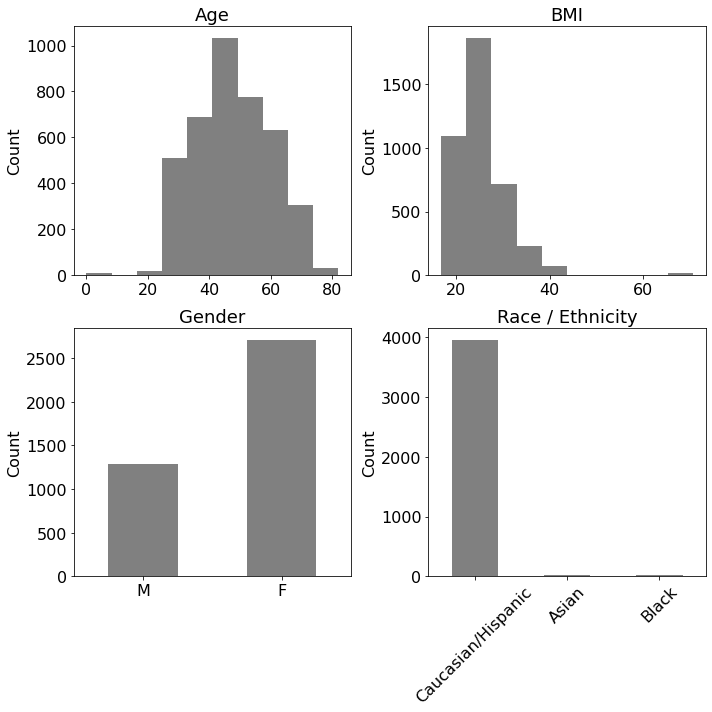

Saving the figure ...


In [33]:
fig_filename = os.path.join(FIGURE_DIR, "MS_{}_total.svg".format(sample))
plot_demographics(data_sample_within_range_ms, fig_filename=fig_filename)




## Demographic summary for MS population of the selected sample - Treated

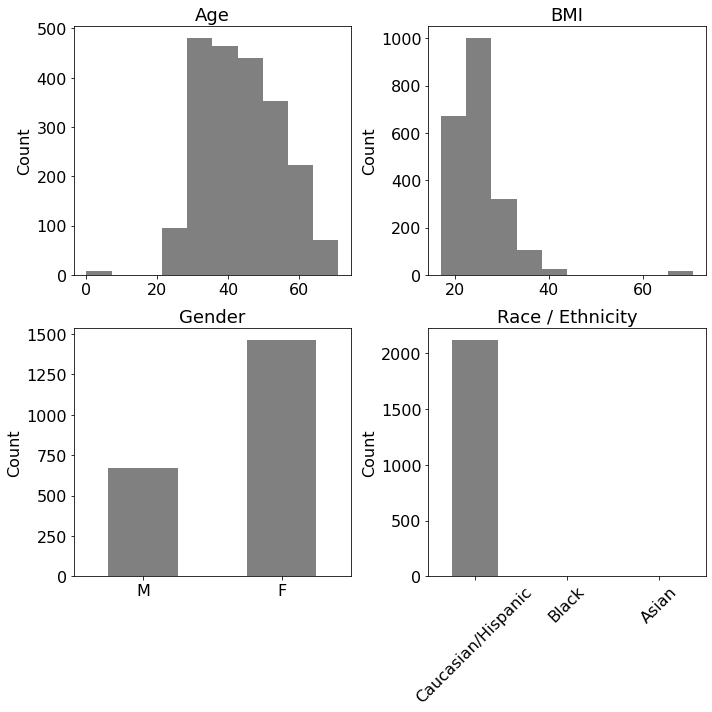

Saving the figure ...


In [34]:
fig_filename = os.path.join(FIGURE_DIR, "MS_{}_treated.svg".format(sample))
plot_demographics(data_sample_within_range_ms_treated, fig_filename=fig_filename)


## Demographic summary for MS population of the selected sample - Non-Treated

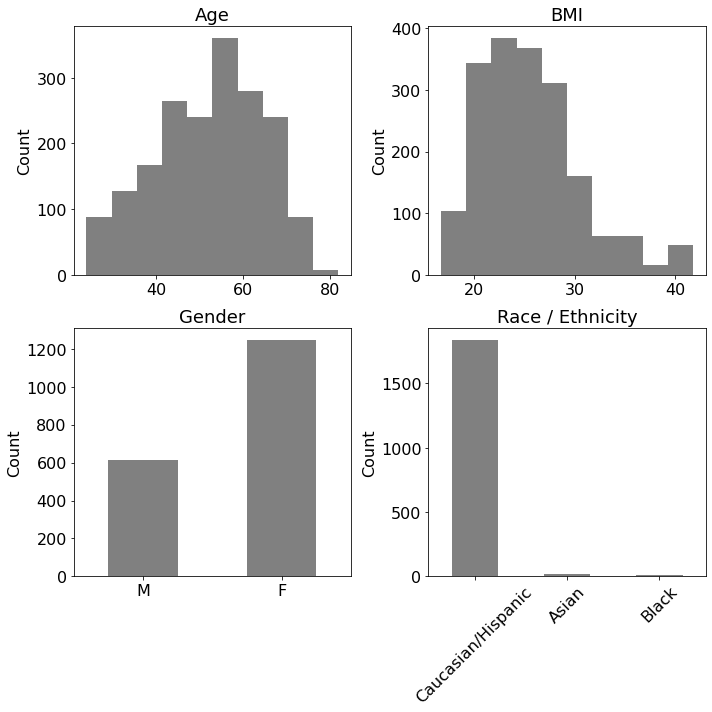

Saving the figure ...


In [35]:
fig_filename = os.path.join(FIGURE_DIR, "MS_{}_non_treated.svg".format(sample))
plot_demographics(data_sample_within_range_ms_non_treated, fig_filename=fig_filename)


## Demographic summary for Control population of the selected sample

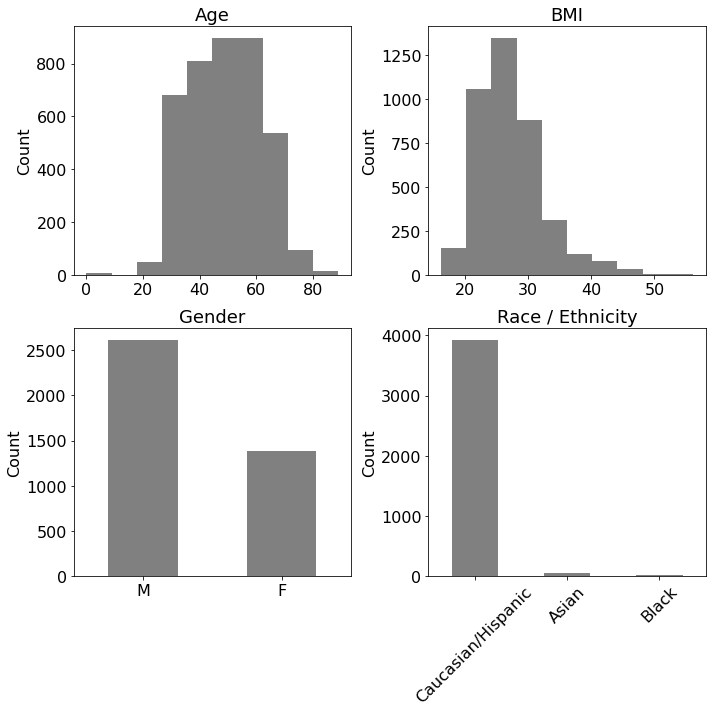

Saving the figure ...


In [36]:
fig_filename = os.path.join(FIGURE_DIR, "Control_{}.svg".format(sample))
plot_demographics(data_sample_within_range_control, fig_filename=fig_filename)
